# **ASSIGNMENT**


In [112]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import PyPDF2

In [113]:
pdf_path = "./sample_sales_data.pdf"
pdf_file = open(pdf_path, 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)

pdf_text = ""
for page in pdf_reader.pages:
    pdf_text += page.extract_text()

# Close the PDF file
pdf_file.close()

In [114]:
data_lines = pdf_text.splitlines()[2:]
data = {
    "Month": [],
    "Product A": [],
    "Product B": [],
    "Product C": []
}

for line in data_lines:
    values = line.split(", ")
    data["Month"].append(values[0])
    data["Product A"].append(int(values[1]))
    data["Product B"].append(int(values[2]))
    data["Product C"].append(int(values[3]))

df = pd.DataFrame(data)
df

,Month,Product A,Product B,Product C
0,February,1400,1100,1600
1,March,1300,1050,1700
2,April,1600,1150,1750
3,May,1700,1300,1800
4,June,1500,1250,1700
5,July,1800,1350,1850
6,August,1900,1400,1900
7,September,1750,1200,1800
8,October,1600,1100,1750
9,November,1400,950,1600


In [115]:
# Calculate column-wise max, min, and average
max_values = df[['Product A', 'Product B', 'Product C']].max()
min_values = df[['Product A', 'Product B', 'Product C']].min()
average_values = df[['Product A', 'Product B', 'Product C']].mean()

# Create summary rows
summary_df = pd.DataFrame({
    'Month': ['Max', 'Min', 'Average'],
    'Product A': [max_values['Product A'], min_values['Product A'], average_values['Product A']],
    'Product B': [max_values['Product B'], min_values['Product B'], average_values['Product B']],
    'Product C': [max_values['Product C'], min_values['Product C'], average_values['Product C']]
})

# Append summary rows to the original DataFrame
df = pd.concat([df, summary_df], ignore_index=True)

# Set display format for floating-point numbers to no decimal places
pd.options.display.float_format = '{:.0f}'.format

print(df)

        Month  Product A  Product B  Product C
0    February       1400       1100       1600
1       March       1300       1050       1700
2       April       1600       1150       1750
3         May       1700       1300       1800
4        June       1500       1250       1700
5        July       1800       1350       1850
6      August       1900       1400       1900
7   September       1750       1200       1800
8     October       1600       1100       1750
9    November       1400        950       1600
10   December       1500       1000       1700
11        Max       1900       1400       1900
12        Min       1300        950       1600
13    Average       1586       1168       1741


<Figure size 1200x600 with 0 Axes>

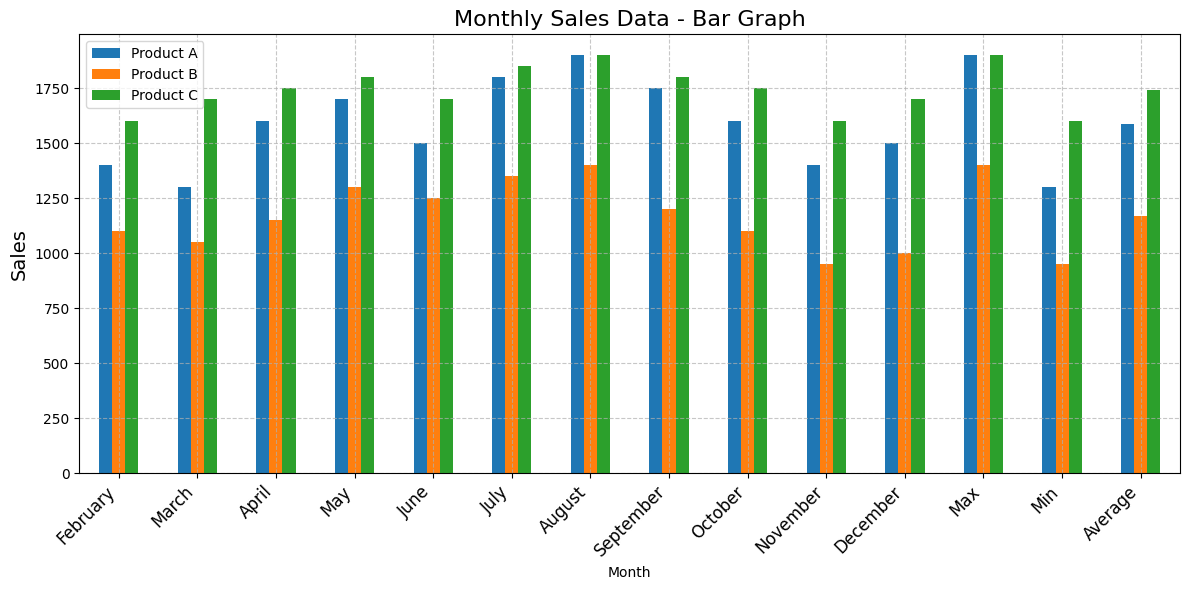

In [116]:
# Bar Plot
plt.figure(figsize=(12, 6))  # Adjust figure size
df.plot(x="Month", kind="bar", figsize=(12, 6))
plt.title("Monthly Sales Data - Bar Graph", fontsize=16)
plt.ylabel("Sales", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

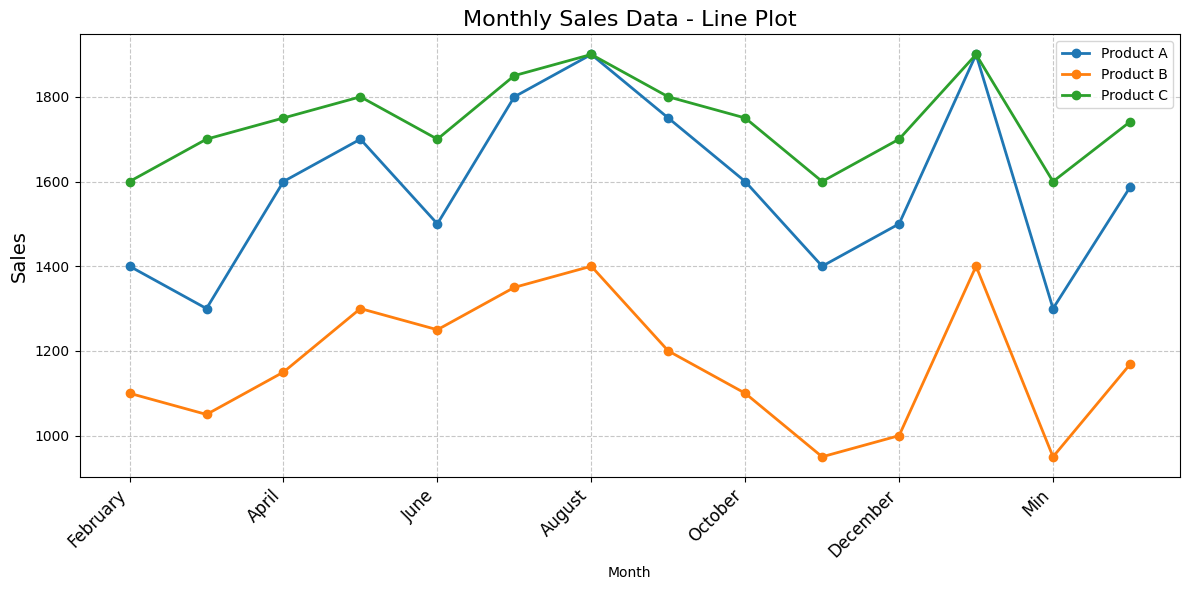

In [117]:
# Line Plot
plt.figure(figsize=(12, 6))
df.plot(x="Month", kind="line", marker='o', linewidth=2, figsize=(12, 6))
plt.title("Monthly Sales Data - Line Plot", fontsize=16)
plt.ylabel("Sales", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

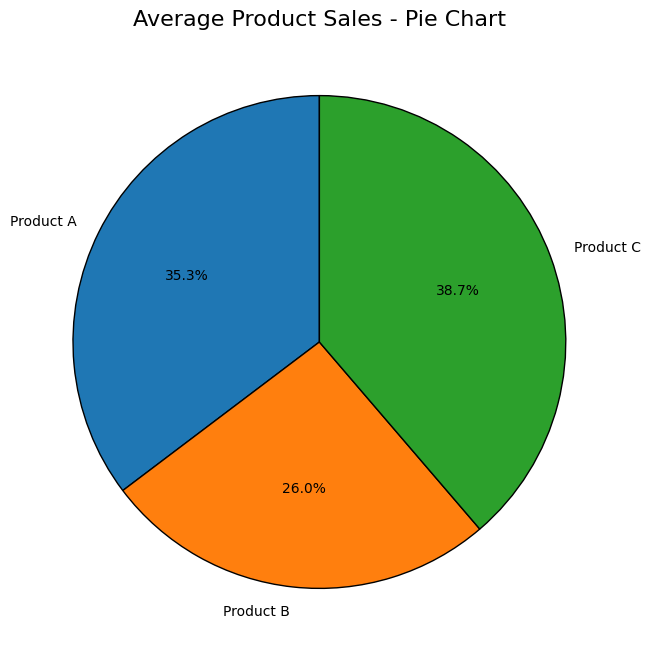

In [118]:
# Pie Chart
plt.figure(figsize=(8, 8))  # Adjust figure size
df[['Product A', 'Product B', 'Product C']].mean().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Average Product Sales - Pie Chart", fontsize=16)
plt.ylabel('', fontsize=14)
plt.show()